# Aleks + Calculus - Group 7 Project
**Members:**
1. Panti, Joseph Rey R.
2. Zalaga, Rolando JR.
3. Santos, Joaquin 
4. Robles, Dinel Christian P.
5. Yang, Stifler Yanic


## Introduction
### ALEKS–Calculus Student Performance Dataset

This dataset contains student performance metrics from the **ALEKS** (Assessment and Learning in Knowledge Spaces) placement test and their corresponding grades in a **Calculus** course.  

It is designed to analyze:
- The relationship between math proficiency (ALEKS) and Calculus success.  
- Learning gains across different mathematical topics (post-test vs. pre-test).  
- Differences in performance between students from **Mapua SHS** vs. external institutions.  



### Topic Weights (used for both `Weighted_Initial` and `Weighted_Post`)

| Topic                               | Weight |
|------------------------------------|---------|
| Algebra & Geometry Review          | 10%     |
| Graphs & Functions                 | 10%     |
| Polynomial & Rational Functions    | 20%     |
| Exponential & Logarithmic Functions| 10%     |
| Trigonometric Identities & Equations | 15%   |
| Systems of Equations & Matrices    | 20%     |
| Conic Sections                     | 15%     |



### Variable Descriptions

| **Category**           | **Variables** | **Description** | **Range/Values** |
|-------------------------|---------------|-----------------|------------------|
| **Target Variable**     | `Calculus_Grade` | Final course grade in Calculus | 1.0 (lowest) to 5.0 (highest) |
| **Student Background**  | `SHS_Status` | High school origin | 0 = Outside Mapua<br>1 = Inside Mapua |
| **Initial ALEKS Scores** | `Algebra_Geometry_Initial`, `Graphs_Functions_Initial`, etc. | Pre-test scores (7 topics) | 0.0 (no mastery) to 1.0 (full mastery) |
| **Post ALEKS Scores** | `Algebra_Geometry_Post`, `Graphs_Functions_Post`, etc. | Post-test scores (7 topics) | 0.0 to 1.0 |
| **Composite Scores** | `Weighted_Initial` | Weighted aggregate scores (Mitchell 2018 weights) | 0.0 to 1.0 |
|  | `Weighted_Post` | Weighted aggregate scores (Mitchell 2018 weights) | 0.0 to 1.0 |
| **Improvement Metrics** | `Net_Gain_[Topic]` | Learning gains (Post – Initial) | -1.0 (decline) to 1.0 (improvement) |



#### Notes
- Both `Weighted_Initial` and `Weighted_Post` use the same topic weights.
- Data supports comparative analysis between **Mapua SHS** and external high school students.


# Importing Necessary Libraries

In [37]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud


# Loading the Data

In [38]:
# Loading the data frame using Pandas library
df = pd.read_excel("Aleks + Calculus DF.xlsx")

In [39]:
# Display first rows
df.head()

,Calculus Grade,SHS,Initial Algebra and Geometry Review,Initial Graphs and Functions,Initial Polynomial and Rational Functions,Initial Exponential and Logarithmic Functions,Initial Trigonometric Identities and Equations,Initial Systems of Equations and Matrices,Initial Conic Sections,Weighted Initial Grade,Post Algebra and Geometry Review,Post Graphs and Functions,Post Polynomial and Rational Functions,Post Exponential and Logarithmic Functions,Post Trigonometric Identities and Equations,Post Systems of Equations and Matrices,Post Conic Sections,Weighted Latest Grade
0,5.0,0,0.42,0.10,0.00,0.00,0.00,0.00,0.00,0.0520,0.42,0.10,0.00,0.00,0.00,0.00,0.00,0.0520
1,3.0,0,0.77,0.25,0.13,0.27,0.00,0.12,0.21,0.2105,0.84,0.59,0.63,0.82,0.29,0.12,0.32,0.4665
2,5.0,0,0.88,0.67,0.19,0.91,0.36,0.18,0.26,0.4130,0.93,0.98,0.69,1.00,0.71,0.65,0.58,0.7525
3,5.0,0,0.49,0.04,0.00,0.09,0.00,0.00,0.00,0.0620,0.71,0.69,0.69,0.55,0.50,0.06,0.00,0.4200
4,5.0,0,0.96,0.78,0.38,0.91,0.64,0.41,0.74,0.6300,0.96,1.00,1.00,1.00,0.79,0.71,0.84,0.8825


In [40]:
df.tail()

,Calculus Grade,SHS,Initial Algebra and Geometry Review,Initial Graphs and Functions,Initial Polynomial and Rational Functions,Initial Exponential and Logarithmic Functions,Initial Trigonometric Identities and Equations,Initial Systems of Equations and Matrices,Initial Conic Sections,Weighted Initial Grade,Post Algebra and Geometry Review,Post Graphs and Functions,Post Polynomial and Rational Functions,Post Exponential and Logarithmic Functions,Post Trigonometric Identities and Equations,Post Systems of Equations and Matrices,Post Conic Sections,Weighted Latest Grade
1983,3.00,0,0.20,0.10,0.0,0.00,0.0,0.0,0.00,0.0300,0.75,0.61,0.44,0.82,0.43,0.06,0.11,0.3990
1984,3.00,0,0.61,0.06,0.0,0.18,0.0,0.0,0.05,0.0925,0.71,0.86,0.63,0.91,0.57,0.00,0.16,0.4835
1985,2.25,0,0.55,0.20,0.0,0.27,0.0,0.0,0.21,0.1335,0.81,0.84,0.75,1.00,0.57,0.00,0.63,0.5950
1986,3.00,0,0.22,0.16,0.0,0.00,0.0,0.0,0.00,0.0380,0.78,0.67,0.56,0.91,0.71,0.24,0.58,0.5895
1987,1.75,0,0.58,0.20,0.0,0.09,0.0,0.0,0.00,0.0870,0.72,0.86,0.81,0.91,0.79,0.00,0.26,0.5685


# Data Cleaning and Preparation

## Check for Duplicates

In [41]:
# Checking if there are any duplicates.
print(f"There are duplciates. {df.duplicated().any()}")
#Counting how many duplicates exists.
print(f"How many duplicates exists? {df.duplicated().sum()}")

There are duplciates. True
How many duplicates exists? 37


A total of **37** duplicated rows were found within the Data Frame.


In [42]:
# Removing Duplicates
df = df.drop_duplicates()
df = df.reset_index(drop= True)
df.duplicated().sum()

np.int64(0)

## Check for Missing Values 

In [43]:
df.shape

(1951, 18)

In [44]:
df.info()
print()
print("=" * 100)
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Calculus Grade                                  1951 non-null   float64
 1   SHS                                             1951 non-null   int64  
 2   Initial Algebra and Geometry Review             1951 non-null   float64
 3   Initial Graphs and Functions                    1951 non-null   float64
 4   Initial Polynomial and Rational Functions       1951 non-null   float64
 5   Initial Exponential and Logarithmic Functions   1951 non-null   float64
 6   Initial Trigonometric Identities and Equations  1951 non-null   float64
 7   Initial Systems of Equations and Matrices       1951 non-null   float64
 8   Initial Conic Sections                          1951 non-null   float64
 9   Weighted Initial Grade                   

Calculus Grade                                    0
SHS                                               0
Initial Algebra and Geometry Review               0
Initial Graphs and Functions                      0
Initial Polynomial and Rational Functions         0
Initial Exponential and Logarithmic Functions     0
Initial Trigonometric Identities and Equations    0
Initial Systems of Equations and Matrices         0
Initial Conic Sections                            0
Weighted Initial Grade                            0
Post Algebra and Geometry Review                  0
Post Graphs and Functions                         0
Post Polynomial and Rational Functions            0
Post Exponential and Logarithmic Functions        0
Post Trigonometric Identities and Equations       0
Post Systems of Equations and Matrices            0
Post Conic Sections                               0
Weighted Latest Grade                             0
dtype: int64

The Data Frame consists of *18 features* and *1951 rows*, where each **doesn't** contain any missing values.

## Check for DataType Format

In [45]:
df.dtypes

Calculus Grade                                    float64
SHS                                                 int64
Initial Algebra and Geometry Review               float64
Initial Graphs and Functions                      float64
Initial Polynomial and Rational Functions         float64
Initial Exponential and Logarithmic Functions     float64
Initial Trigonometric Identities and Equations    float64
Initial Systems of Equations and Matrices         float64
Initial Conic Sections                            float64
Weighted Initial Grade                            float64
Post Algebra and Geometry Review                  float64
Post Graphs and Functions                         float64
Post Polynomial and Rational Functions            float64
Post Exponential and Logarithmic Functions        float64
Post Trigonometric Identities and Equations       float64
Post Systems of Equations and Matrices            float64
Post Conic Sections                               float64
Weighted Lates

All features except for SHS is a `float64`. SHS on the other hand is the only `int64`

## Check for Inconsistencies

In [46]:
def check_number_consistency(df, col, min_val, max_val):
    """
    Checks whether all values in a numeric column fall within a specified range.
    
    Returns:
        True  → if all values are consistent (within range)
        False → if any values are inconsistent (out of range)
    """
    # Identify out-of-range values
    invalid = df[(df[col] < min_val) | (df[col] > max_val)]
    
    if invalid.empty:
        print(f"CONSISTENT - {col}")
        return True
    else:
        print(f"INCONSISTENT - {col}")
        return False
    

check_number_consistency(df, "Calculus Grade", 0, 5)

for col in df.select_dtypes(include=['number']).columns:
    if(col != 'Calculus Grade'):
        check_number_consistency(df, col, 0, 1)


CONSISTENT - Calculus Grade
CONSISTENT - SHS
CONSISTENT - Initial Algebra and Geometry Review
CONSISTENT - Initial Graphs and Functions
CONSISTENT - Initial Polynomial and Rational Functions
CONSISTENT - Initial Exponential and Logarithmic Functions
CONSISTENT - Initial Trigonometric Identities and Equations
CONSISTENT - Initial Systems of Equations and Matrices
CONSISTENT - Initial Conic Sections
CONSISTENT - Weighted Initial Grade
CONSISTENT - Post Algebra and Geometry Review
CONSISTENT - Post Graphs and Functions
CONSISTENT - Post Polynomial and Rational Functions
CONSISTENT - Post Exponential and Logarithmic Functions
CONSISTENT - Post Trigonometric Identities and Equations
CONSISTENT - Post Systems of Equations and Matrices
CONSISTENT - Post Conic Sections
CONSISTENT - Weighted Latest Grade


There are no inconsistencies found within the Data Frame.

# Exploratory Data Analysis

## Average Mastery per Topic

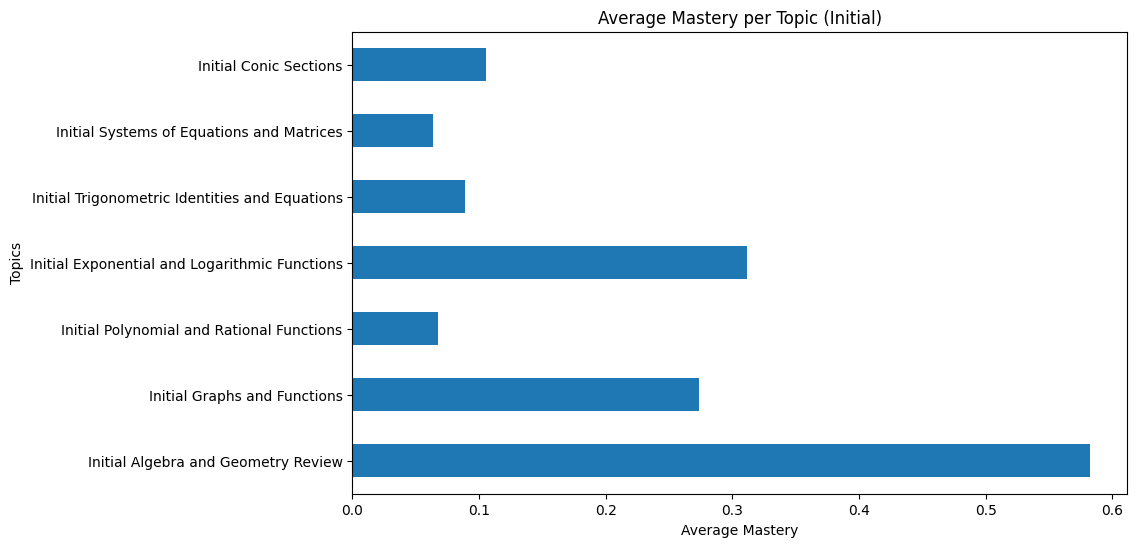

Highest Initial Algebra and Geometry Review: 0.5826909277293695
Highest Initial Systems of Equations and Matrices: 0.06345463864684776


In [47]:
# Average Grade Per Topic (Initial)
df_average_initials = df.iloc[:, [2,3,4,5,6,7,8]].mean()

df_average_initials.plot(kind='barh', figsize=(10,6))

plt.title("Average Mastery per Topic (Initial)")
plt.xlabel("Average Mastery")
plt.ylabel("Topics")
plt.show()

print(f"Highest {df_average_initials.idxmax()}: {df_average_initials[df_average_initials.idxmax()]}")
print(f"Highest {df_average_initials.idxmin()}: {df_average_initials[df_average_initials.idxmin()]}")


The pre-test reveals that the students excel in topics like **Algebra and Geometry** with an average mastery of *58.27%*, on the other hand many of the students struggles with **Systems of Equations and Matrices**, **Trigonometric Identities and Equations**, and **Polynomial and Rational Functions**. The topic where most students fail is **Systems of Equations and Matrices** with an average mastery of *6.34%*

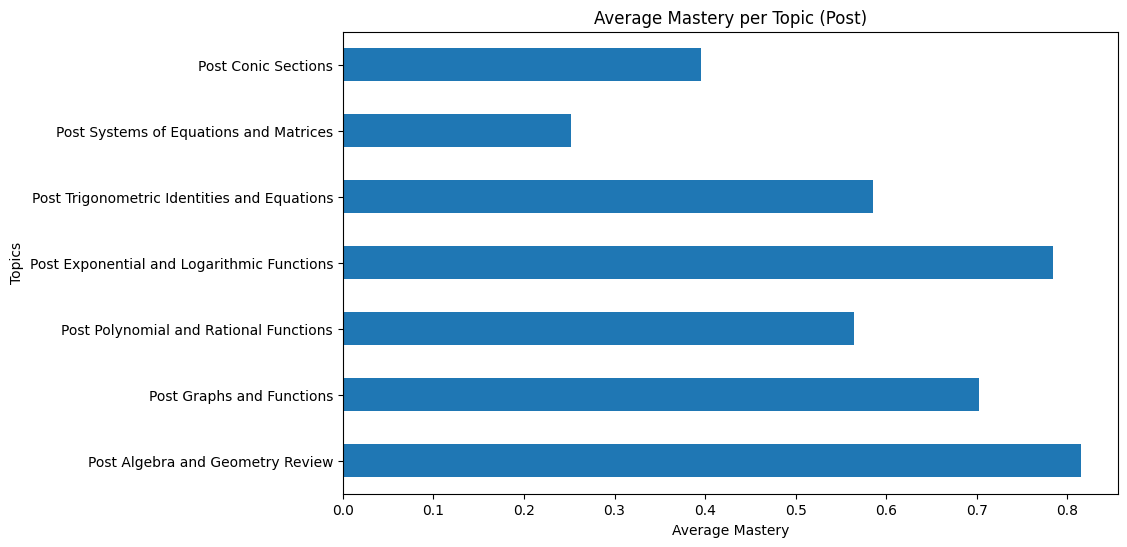

Highest Post Algebra and Geometry Review: 0.8148436699128653
Highest Post Systems of Equations and Matrices: 0.25156330087134804


In [48]:
# Average Grade Per Topic (Post)
df_average_posts = df.iloc[:, [10,11,12,13,14,15,16]].mean()

df_average_posts.plot(kind='barh', figsize=(10,6))

plt.title("Average Mastery per Topic (Post)")
plt.xlabel("Average Mastery")
plt.ylabel("Topics")
plt.show()

print(f"Highest {df_average_posts.idxmax()}: {df_average_posts[df_average_posts.idxmax()]}")
print(f"Highest {df_average_posts.idxmin()}: {df_average_posts[df_average_posts.idxmin()]}")

The post-test reveals that students had drastically improved their mastery of Mathematical topics after taking the course. The topic with the highest mastery is still **Algebra and Geometry review** with an average mastery of *81.48%*. Students have also made some improvements on the topics they initially struggle with like **Trigonometric Identities and Equations** and **Polynomial and Rational Functions**. However, students still struggle with **Systems of Equations and Matrices** with an average mastery of *25.15%*.

## Histogram for Each Topics (Initial vs Post)

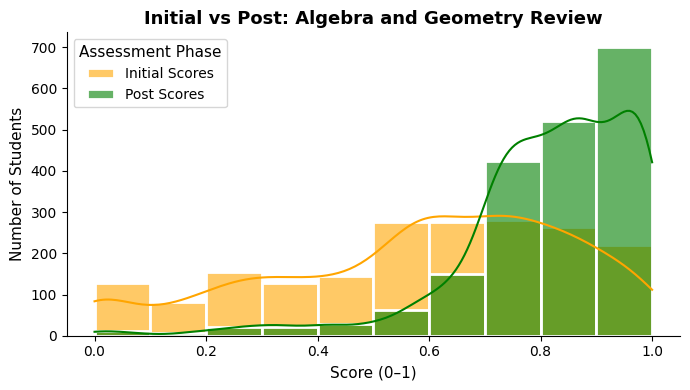

In [74]:
# Algebra and Geometry Review
plt.figure(figsize=(7, 4))

sns.histplot(
    df['Initial Algebra and Geometry Review'], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df['Post Algebra and Geometry Review'], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Algebra and Geometry Review", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The graph presents a comparison of Weighted Initial Scores (orange) and Weighted Post Scores (green) through a dual histogram and kernel density plot, demonstrating a dramatic positive change in the score distribution. The Initial Scores show a relatively broad distribution, peaking around the 0.6 to 0.8 range, indicating scores are spread across the middle and upper-middle segments. In stark contrast, the Post Scores exhibit a significant shift toward the high end, with the distribution heavily skewed right and the tallest bar reaching a count of approximately 700 in the 0.9 to 1.0 range, clearly illustrating that the post-intervention scores are much higher and more concentrated near the maximum possible score of 1.0.

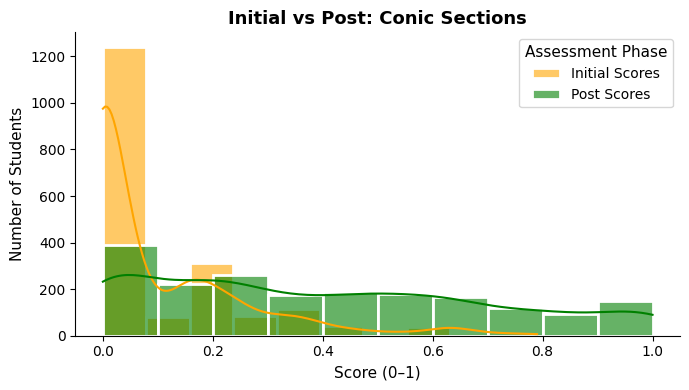

In [76]:
# Conic Sections
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Conic Sections"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df["Post Conic Sections"], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Conic Sections", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The accompanying graph clearly illustrates a dramatic and positive transformation in the score distribution when comparing the Initial Scores (orange) to the Post Scores (green). The Initial Scores exhibit an extreme concentration at the low end of the spectrum, with the tallest bar reaching a count of over 1,200 in the 0.0 to 0.1 range, demonstrating that a vast majority of initial scores were near zero. In sharp contrast, the Post Scores distribution shows a clear and significant shift to the higher end of the scale, with the population now showing a more even spread across all bins, and substantial counts appearing in the 0.4 to 1.0 range. This change indicates a substantial overall improvement following the intervention, successfully moving the student population from predominantly very low scores to a much higher and more widely distributed performance level.


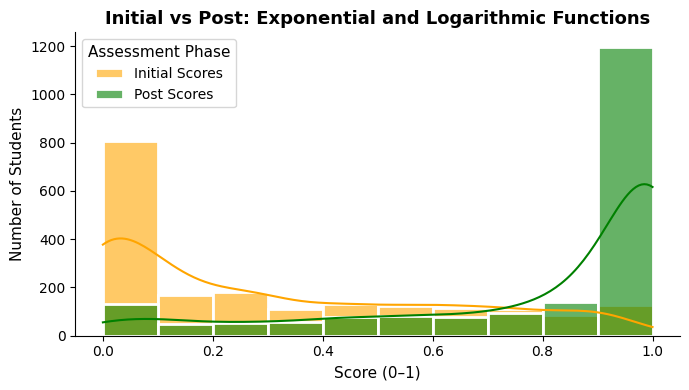

In [78]:
# Initial Exponential and Logarithmic Functions
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Exponential and Logarithmic Functions"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df["Post Exponential and Logarithmic Functions"], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Exponential and Logarithmic Functions", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The chart compares students’ performance in the topic Exponential and Logarithmic Functions before and after instruction. The orange distribution represents the initial scores, where most students scored very low, with a strong concentration near 0.0–0.1, indicating limited prior understanding of the topic. In contrast, the green distribution represents the post scores, which show a dramatic shift toward higher values, with a prominent peak near 1.0. This suggests that a large number of students achieved near-perfect scores after the learning intervention. Overall, the visualization highlights a significant improvement in students’ comprehension and mastery of exponential and logarithmic functions, demonstrating the effectiveness of the instruction or review activities that took place between the two assessments.

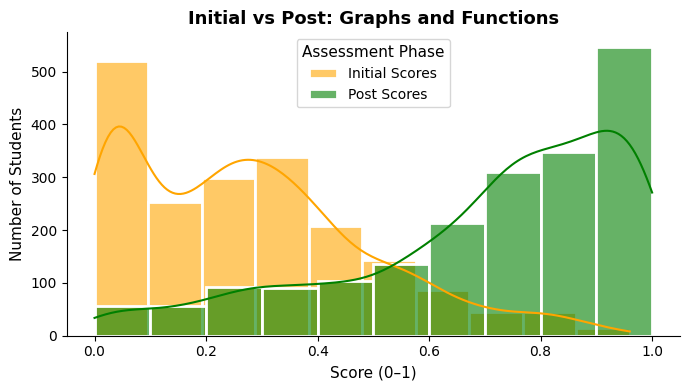

In [80]:
# Graphs and Functions
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Graphs and Functions"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df['Post Graphs and Functions'], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Graphs and Functions", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The chart illustrates students’ performance in Graphs and Functions before and after instruction. The orange bars and line represent the initial scores, where most students scored low, particularly around the 0.0–0.2 range, showing limited initial understanding. The green bars and line indicate the post scores, which reveal a strong improvement, with scores gradually increasing toward the higher end and peaking near 1.0. This clear shift from low to high scores demonstrates significant learning gains, suggesting that after the instructional period, students developed a much better grasp of graphing concepts and functional relationships.

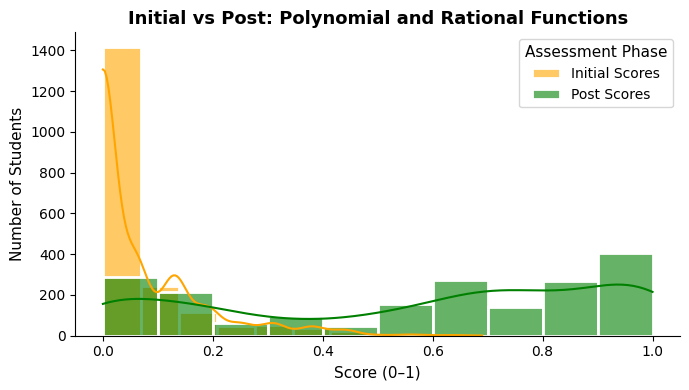

In [ ]:
# Polynomial and Rational Functions
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Polynomial and Rational Functions"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df['Post Polynomial and Rational Functions'], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Polynomial and Rational Functions", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The chart presents a comparison of students’ Initial and Post Scores in the topic Polynomial and Rational Functions. The orange bars and line show that most students initially scored very low, with a sharp concentration near 0.0, indicating major difficulties with the topic before instruction. The green bars and line, representing post-assessment results, reveal a noticeable improvement, as more students achieved higher scores distributed across the 0.5–1.0 range. Although the improvement is not as dramatic as in some other topics, the shift toward higher scores still demonstrates significant learning progress and better understanding of polynomial and rational functions after instruction.

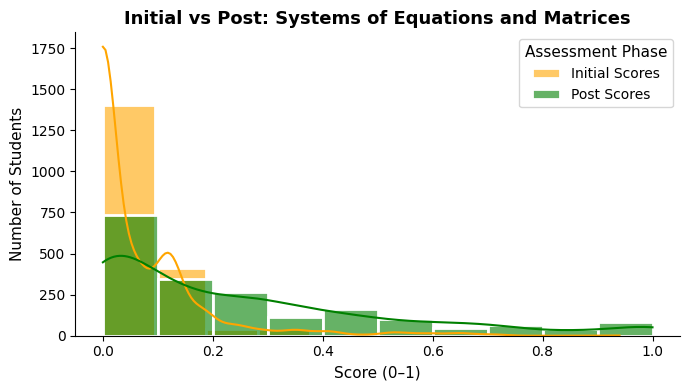

In [82]:
# Systems of Equations and Matrices
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Systems of Equations and Matrices"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df['Post Systems of Equations and Matrices'], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Systems of Equations and Matrices", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The chart compares students’ Initial and Post Scores in the topic Systems of Equations and Matrices. The orange bars and line show that the majority of students initially scored very low, with a sharp peak near 0.0, suggesting that many struggled with this topic at first. The green bars and line indicate post-assessment results, which show a modest shift toward higher scores, though most scores still remain on the lower end of the scale. While there is visible improvement, it appears that students continued to face challenges in fully mastering systems of equations and matrices compared to other topics, implying that this area may require additional reinforcement or instructional support.

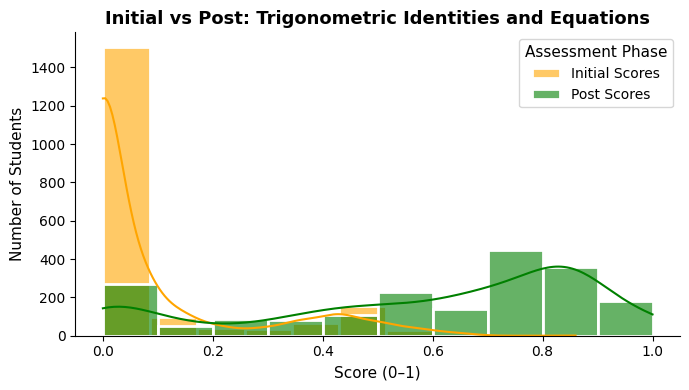

In [83]:
# Trigonometric Identities and Equations
plt.figure(figsize=(7, 4))

sns.histplot(
    df["Initial Trigonometric Identities and Equations"], 
    bins=10, kde=True, color="orange", label="Initial Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df['Post Trigonometric Identities and Equations'], 
    bins=10, kde=True, color="green", label="Post Scores", alpha=0.6,
    edgecolor="white", linewidth=2
)

plt.legend(title="Assessment Phase", title_fontsize=11, fontsize=10)
plt.title("Initial vs Post: Trigonometric Identities and Equations", fontsize=13, weight="bold")
plt.xlabel("Score (0–1)", fontsize=11)
plt.ylabel("Number of Students", fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

The chart shows a comparison between students’ Initial and Post Scores in Trigonometric Identities and Equations. The orange bars and line reveal that most students initially scored very low, with a pronounced peak at 0.0, indicating limited understanding of the topic at the start. In contrast, the green bars and line display a significant improvement in the post-assessment, with scores shifting toward the higher range, particularly between 0.7 and 0.9. This upward shift demonstrates that students developed a much stronger grasp of trigonometric identities and equations after instruction, reflecting effective learning and conceptual growth in this area.

## Distribution of Calculus Grades Findings

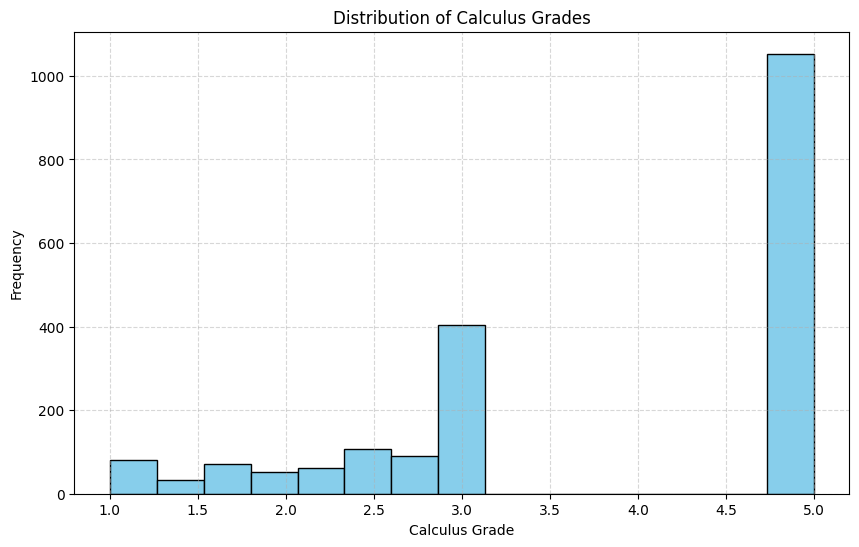

In [49]:
# Distribution of Calculus Grades Findings
plt.figure(figsize=(10,6))
plt.hist(df['Calculus Grade'], bins=15, color='skyblue', edgecolor='black')

plt.title('Distribution of Calculus Grades')
plt.xlabel('Calculus Grade')
plt.ylabel('Frequency')

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

The distribution is strongly skewed to the right (positive skew), with the mode (the tallest bar) concentrated entirely at the 5.0 (Fail) category, which has a frequency exceeding 1000. Conversely, grades representing a passing or excellent performance (1.0 through 4.0) have extremely low frequencies. This stark distribution indicates a mass failure in the course, where the overwhelming majority of students did not meet the minimum passing requirement, signaling a severe need for intervention regarding course difficulty, exam design, or the students' initial preparation level.

## Distribution of Weighted Initial Grades Findings

This helps us see if students improved after taking the modules.

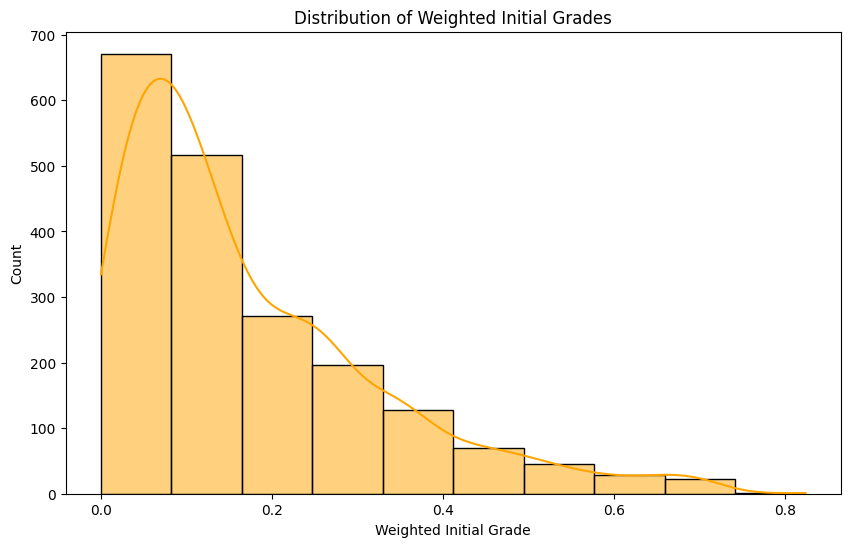

In [50]:
#Distribution of Weighted Initial Grades Findings
plt.figure(figsize=(10,6))
sns.histplot(df['Weighted Initial Grade'], kde=True, color='orange', bins=10)

plt.title('Distribution of Weighted Initial Grades')
plt.xlabel('Weighted Initial Grade')
plt.ylabel('Count')
plt.show()


The distribution of a variable labeled "Weighted Initial Grade" ranging from approximately 0.0 to 0.8. The distribution is highly right-skewed (positive skew), with the overwhelming majority of the data concentrated near 0.0. The peak of the distribution (mode) is in the 0.0−0.05 range, with a count exceeding 650. The frequency drops off sharply as the weighted grade increases, suggesting that most subjects or students started with a very low initial weighted grade. This distribution likely represents a measure of initial proficiency or knowledge gap, where a grade closer to 0.0 indicates a better or more complete starting position in the ALEKS system.

## Distrubution of Weighted Latest Grades Findings

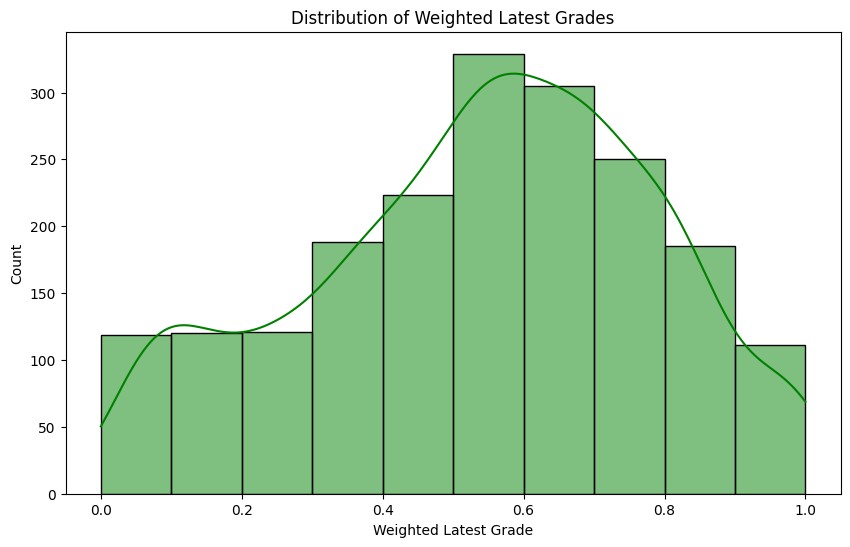

In [51]:
#Distrubution of Weighted Latest Grades Findings
plt.figure(figsize=(10,6))
sns.histplot(df['Weighted Latest Grade'], kde=True, color='green', bins=10)
plt.title('Distribution of Weighted Latest Grades')
plt.xlabel('Weighted Latest Grade')
plt.ylabel('Count')
plt.show()


The distribution of "Weighted Latest Grade" across a continuous range from 0.0 to 1.0. Unlike the "Initial Grades," this distribution is approximately bell-shaped, or slightly skewed to the left (negative skew), with most of the grades concentrated in the upper-middle range. The mode is located between approximately 0.5 and 0.7, with a peak count exceeding 300. Frequencies taper off towards both the low end (0.0) and the high end (1.0). The overall shape suggests that the majority of students achieved weighted latest grades in the satisfactory-to-good range, indicating improvement from the initial grades or a better overall performance as the course progressed.

# Weighted Initial Grade vs Weighted Latest Grade

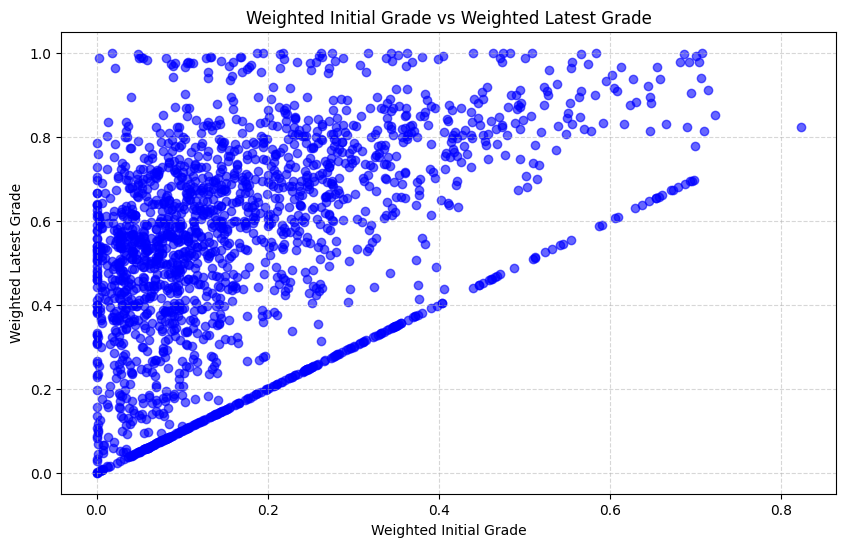

In [52]:
#Weighted Initial Grade vs Weighted Latest Grade
plt.figure(figsize=(10,6))
plt.scatter(df['Weighted Initial Grade'], df['Weighted Latest Grade'], alpha=0.6, color='blue')
plt.title('Weighted Initial Grade vs Weighted Latest Grade')
plt.xlabel('Weighted Initial Grade')
plt.ylabel('Weighted Latest Grade')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The scatter plot compares the "Weighted Initial Grade" (x-axis) to the "Weighted Latest Grade" (y-axis), both ranging from 0.0 to 1.0. A strong pattern is immediately evident: a dense cluster of points forms a straight diagonal line from the bottom-left corner (0.0, 0.0) up to approximately (0.7, 0.7). This line represents cases where the latest grade is virtually identical to the initial grade, indicating no change in performance for a significant subset of the data. However, a large number of points are scattered above this diagonal line, particularly concentrated in the area of low initial grades (<0.3) and high latest grades (>0.5). This upper scatter indicates a powerful general trend of improvement, where students with lower initial grades successfully achieved much higher latest grades. The plot suggests the learning intervention (presumably represented by the "latest grade") was highly effective for many, resulting in substantial positive movement in scores.

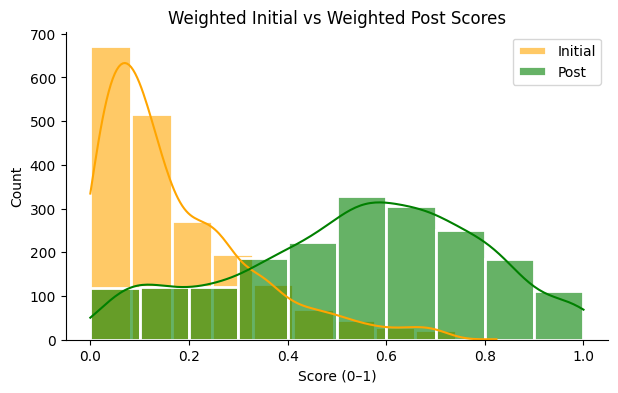

In [71]:
#Weighted Initial Grade vs Weighted Latest Grade
plt.figure(figsize=(7,4))
sns.histplot(
    df['Weighted Initial Grade'], 
    bins=10, kde=True, color="orange", label="Initial", alpha=0.6,
    edgecolor="white", linewidth=2
)
sns.histplot(
    df["Weighted Latest Grade"], 
    bins=10, kde=True, color="green", label="Post", alpha=0.6,
    edgecolor="white", linewidth=2
)
plt.legend()
plt.title("Weighted Initial vs Weighted Post Scores")
plt.xlabel("Score (0–1)")
plt.ylabel("Count")
sns.despine()  # optional: removes top/right border of plot
plt.show()

The accompanying graph clearly illustrates a dramatic and positive transformation in the score distribution when comparing the Weighted Initial Scores (orange) to the Weighted Post Scores (green). The Initial Scores exhibit a high concentration at the low end of the spectrum, with the tallest bar reaching a count of approximately 650 in the 0.0 to 0.1 range, demonstrating that a substantial portion of initial scores were very low. In sharp contrast, the Post Scores distribution shows a clear and significant shift to the higher end of the scale, with the main bulk of scores falling between 0.4 and 0.9. This change indicates a substantial overall improvement following the intervention, moving the population from predominantly very low scores to a much higher and more widely distributed performance level.

# Mapúa vs. Non-Mapúa SHS

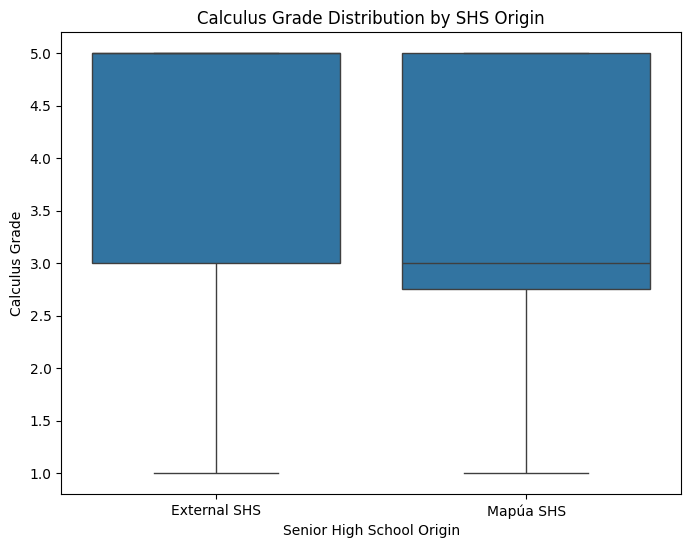

In [72]:
# Mapua vs Non-Mapua SHS
plt.figure(figsize=(8,6))
sns.boxplot(x='SHS', y='Calculus Grade', data=df)
plt.title('Calculus Grade Distribution by SHS Origin')
plt.xlabel('Senior High School Origin')
plt.ylabel('Calculus Grade')
plt.xticks([0, 1], ['External SHS', 'Mapúa SHS'])
plt.show()


This boxplot is comparing the Calculus grades of students from Mapúa SHS versus those students who come from other schools. While both have wide ranges for their grades, the median for the former is a bit lower, which entails that they performed generally better since grades reflect the reverse of performance. The dispersion in scores for both groups is rather similar, suggesting the levels of consistency for both groups are comparable. Overall, the results suggest that coming from Mapúa SHS may provide a slight advantage in adapting to university-level Calculus.

# Preprocessing

In [56]:
# 1) target var and split-target
from sklearn.model_selection import train_test_split

# target variable is Final Grade
target_col = 'Calculus Grade'
assert target_col in df.columns, f"Target column '{target_col}' not found. Available: {list(df.columns)}"

X = df.drop(columns=[target_col])
y = df[target_col]

# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if y.nunique()<=10 else None)



In [57]:
# 2) identify column types and build preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

# split into a 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y if y.nunique()<=10 else None)

#identify if numerical or categorical
num = X_train.select_dtypes(include=['number']).columns.tolist()
cat = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# binary/ordinal or nominal
binary_or_ordinal = [col for col in cat if X_train[col].nunique(dropna=True) == 2]
nominal = [col for col in cat if col not in binary_or_ordinal]

# transformers
num_trans = StandardScaler()
bin_trans = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
nom_trans = OneHotEncoder(handle_unknown='ignore')

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_trans, num),
        ('bin', bin_trans, binary_or_ordinal),
        ('nom', nom_trans, nominal)
    ],
    remainder='drop'
)

# pipeline for preprocessing
preprocess_pipeline = Pipeline(steps=[('preprocess', preprocess)])

print('Column groups -> numeric:', num, '| binary/ordinal:', binary_or_ordinal, '| nominal:', nominal)


Column groups -> numeric: ['SHS', 'Initial Algebra and Geometry Review', 'Initial Graphs and Functions', 'Initial Polynomial and Rational Functions', 'Initial Exponential and Logarithmic Functions', 'Initial Trigonometric Identities and Equations', 'Initial Systems of Equations and Matrices', 'Initial Conic Sections', 'Weighted Initial Grade', 'Post Algebra and Geometry Review', 'Post Graphs and Functions', 'Post Polynomial and Rational Functions', 'Post Exponential and Logarithmic Functions', 'Post Trigonometric Identities and Equations', 'Post Systems of Equations and Matrices', 'Post Conic Sections', 'Weighted Latest Grade'] | binary/ordinal: [] | nominal: []


In [58]:
# 3) fit and transform data + scaling so it fits the model

# fit on train, transform both train and test
X_train_pre = preprocess_pipeline.fit_transform(X_train)
X_test_pre = preprocess_pipeline.transform(X_test)


feature_names = []

feature_names = preprocess_pipeline.named_steps['preprocess'].get_feature_names_out()
feature_names = [str(name) for name in feature_names]


print('Train/Validation transformed shapes -> X_train_pre (70%):', X_train_pre.shape, '| X_test_pre (validation 30%):', X_test_pre.shape)
print('Number of output features:', len(feature_names))


Train/Validation transformed shapes -> X_train_pre (70%): (1365, 17) | X_test_pre (validation 30%): (586, 17)
Number of output features: 17
